# A simple model for vaccination

In this etivity, we are going back to the simple SIR model from week 3, without births or deaths, to look at the effect of vaccination. The aim of this etivity is to represent vaccination in a very simple way - we are assuming it already happened before we run our model! By changing the initial conditions, we can prepare the population so that it has received a certain coverage of vaccination. Even though this is very simplistic, it will allow us to study some important effects of vaccination on the infection dynamics.

We are starting with the transmission and recovery parameters *beta* = 0.4 days$^{-1}$ and *gamma* = 0.1 days $^{-1}$. To incorporate immunity from vaccination in the model, we assume that a proportion *p* of the total population starts in the recovered compartment, representing the vaccine coverage and assuming the vaccine is perfectly effective. Again, we assume the epidemic starts with a single infected case introduced into the population.

Model this scenario for a duration of 2 years, assuming that the vaccine coverage is 50%, and plot the prevalence in each compartment over time. Confirm that you observe an epidemic peaking at around 125 days after introduction of the infectious person in the population. Also have a look at the proportion susceptible and recovered, to double-check this looks like what you would expect given your initial conditions.

### Question: Does everyone in the population need to be vaccinated in order to prevent an epidemic? What do you observe if you model the infection dynamics with different values for *p*? Can you explain why?

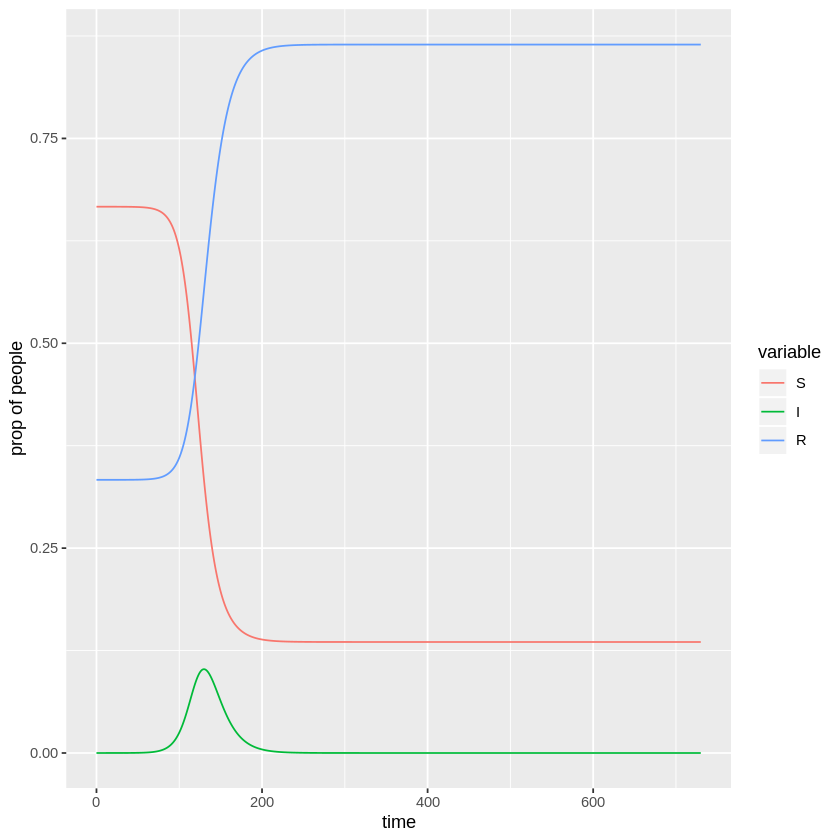

In [1]:
### YOUR CODE GOES HERE ###


library(ggplot2)
library(deSolve)
library(reshape2)

vaccine_coverage=0.5
Initial_number_suspected=(1-vaccine_coverage)*999999
Initial_number_infected=1
Initial_number_recovered=vaccine_coverage*0.5*999999


Initial_states<- c(S=Initial_number_suspected,I=Initial_number_infected,R=Initial_number_recovered)

#necessary parameters
N=1000000

parameters<- c(beta=0.4,gamma=0.1)

timestep<- seq(0,2*365,by=1)

vaccine_model<-function(timestep,Initial_states,parameters)
    {
    with(as.list(c(Initial_states,parameters)),
        
        {
            
            lamda=beta*I/N
            
            dS<- -lamda*S
            dI<- (lamda*S)-(gamma*I)
            dR<- gamma*I
            
        return(list(c(dS,dI,dR)))
        }
        )
}


output<- as.data.frame(ode(y=Initial_states,
             times=timestep,
             func=vaccine_model,
             parms=parameters
            ))

output_prop<- output/(output$I+output$S+output$R)
output_prop$time<-output$time

output_long<- melt(as.data.frame(output_prop),id="time")
ggplot(data=output_long,
      aes(x=time,
         y=value,
         colour=variable,
         group=variable))+
         geom_line()+
         xlab("time")+
         ylab("prop of people")

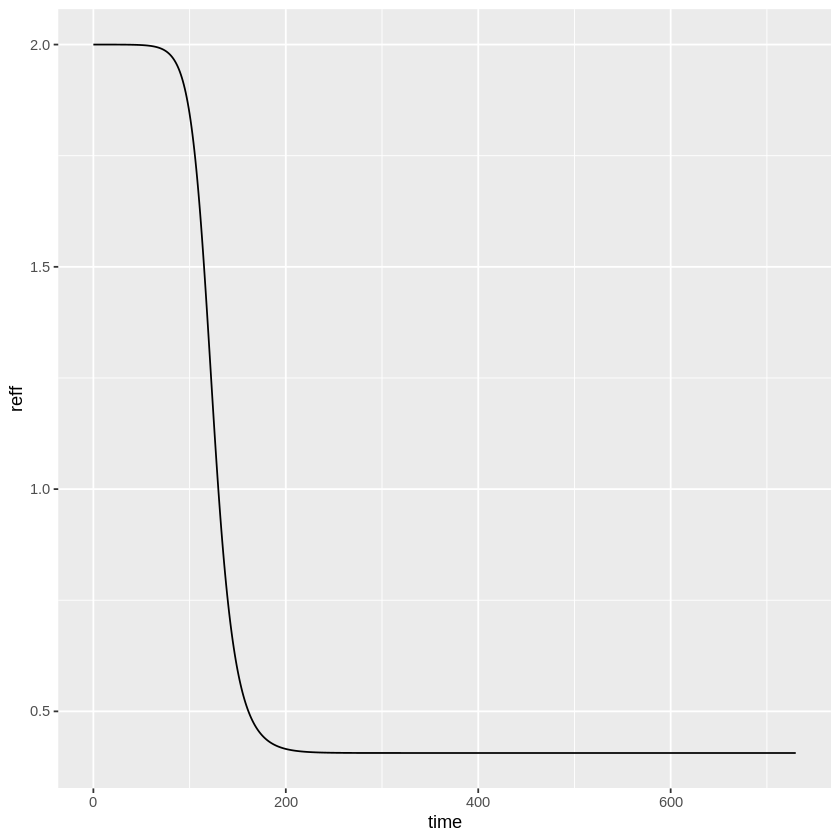

In [5]:
output$reff= parameters["beta"]/parameters["gamma"]*output$S/(1000000)
ggplot(data=output,
      aes(x=time,
         y=output$reff,
         ))+
         geom_line()+
         xlab("time")+
         ylab("reff")

Hopefully, you have seen that once a certain proportion of the population is immune, no epidemic occurs. This is called the **critical vaccination threshold** or **herd immunity threshold**.

Now, use your code above to investigate how the herd immunity threshold changes if we are modelling a disease with a different infection and recovery rate. 

### Question: What proportion of the population needs to be vaccinated in order to prevent an epidemic if *beta* = 0.4 and *gamma* = 0.2 days$^{-1}$? What if *beta* = 0.6 and *gamma* = 0.1 days$^{-1}$?

As you can see, the proportion of the population that needs to be vaccinated varies with different infection-related parameters. Think about why that is so in the context of herd immunity, and what is different between the scenarios you have just modelled. 

### Question: Remember that vaccination changes the effective reproduction number, by reducing the number of people who are susceptible. Based on your answers to the previous questions, can you use the formula for the effective reproduction number R<sub>eff</sub> to derive a formula for calculating the critical vaccination threshold?